# Aprendizaje Automático - Práctica 1 - Experimentación con clasificadores y regresores

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 14 de Abril de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>MIGUEL ÁNGEL FERNÁNDEZ ALONSO
</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: EL PROBLEMA DEL SOBREAJUSTE (2 puntos)</font>

<font color='blue'>Aprendizaje Automático (AA) es la rama de la Inteligencia Artificial (IA) que se ocupa de diseñar e implementar máquinas que sean capaces de aprender a realizar una determinada tarea a partir de los propios datos (es decir, sin necesidad de ser programadas explícitamente para ello). El principal objetivo de los modelos de AA es realizar predicciones/estimaciones más allá de los conjuntos de datos con los que fueron entrenados y, como es lógico, se pretende que dichos modelos sean capaces de $generalizar$ más allá de los ejemplos vistos en entrenamiento. Como consecuencia, uno de los mayores obstáculos a los que nos enfrentamos se conoce como $sobreajuste$ ($overfitting$): el hecho de que nuestros pesos/parámetros estén demasiado apegados a nuestros ejemplos de entrenamiento, y se produzca una brecha a nivel de generalización (en donde los resultados en entrenamiento serían manifiestamente mejores que en test).

<font color='blue'>En este ejercicio intentaremos profundizar un poco en lo que es el sobreajuste, así como las causas y consecuencias del mismo.



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [ ]:
!pip install tabulate
from tabulate import tabulate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

In [ ]:
import sklearn
if sklearn.__version__ < '1.3':
  # Actualizamos scikit-learn para tener la última versión.
  # Nos interesa de cara a disponer de las más recientes funcionalidades
  # (como, por ejemplo, poder usar cross_validate() empleando el parámetros return_indices=True; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
  !pip install scikit-learn --upgrade
else:
  print('La versión de scikit-learn es: ', sklearn.__version__)


La versión de scikit-learn es:  1.4.2






---






### <font color='blue'>Ejercicio 1.A: Regresión en 1D (1 punto)</font>

<font color='blue'> En este ejercicio se intentará aproximar una función continua unidimensional por medio de regresión lineal (`LinearRegression()`), y se irá, progresivamente, incrementando la complejidad del modelo empleando características polinomiales (`PolynomialFeatures()`), de grados $\{1, 2, 4, 8, 16, 32\}$. La función real a aproximar (nuestra $\textit{ground truth}$) es: $f(x) = cos(1.5\cdot\pi\cdot x) + sin(0.5\cdot\pi\cdot x)$.

<font color='blue'> Las tareas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código de la función real a aproximar.
2.   Generamos las entradas ($X$): 20 puntos aleatorios en el intervalo $[0,1]$.
3.   Generamos las salidas deseadas ($y$): el valor resultante de emplear la función real y sumarle un cierto error aleatorio (`np.random.randn`: distribución Normal estándar), que pretende simular el ruido que pueden contener las etiquetas ($labels$/$targets$) en cualquier problema.
4.   Generamos las características polinomiales asociadas con los grados proporcionados, y creamos un $pipeline$ (usando `Pipeline` o `make_pipeline`) con dichas características y regresión lineal.
5.   Realizamos el ajuste (`fit`) de dicho `pipeline` con $X$ e $y$, y empleamos `cross_val_score`, o `cross_validate`, para evaluar el rendimiento utilizando $\textit{10-fold cross-validation}$ y el error cuadrático medio ($MSE$) como métrica de error.
6. Mostramos figuras con ajustes. Para ello, generamos 1000 valores equiespaciados en el intervalo $[0,1]$, y realizamos la predicción de nuestro modelo (`pipeline.predict`) sobre dichos datos para mostrar, en rojo, la función que aproxima nuestro modelo entrenado. En la misma figura incluiremos, en azul, la función real empleada para generar los datos, y los puntos/muestras generadas ($X$ e $y$). El título de cada figura debe incluir el grado del polinomio.
7. Junto con estas figuras, se debe mostrar una tabla (y aquí la librería `tabulate` puede ser de utilidad) que incluya, el grado del polinomio en la primera fila ($header$ de la tabla), el número de pesos/coeficientes en la segunda, el $MSE$ (promedio y desviación típica) obtenido en entrenamiento en validación cruzada en la tercera fila, el $MSE$ (promedio y desviación típica) obtenido en test en validación cruzada en la cuarta fila, y el valor medio de los coeficientes aprendidos en valor absoluto con cada uno de los 6 modelos ajustados (incluyendo el $bias$ o $intercept$) en la última.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas: ¿se observa algún patrón en los resultados obtenidos, así como en la magnitud de los coeficientes tras el entrenamiento? ¿Se observa algún fenómeno de infraentrenamiento ($underfitting$) o sobreentrenamiento ($overfitting$)? ¿Qué grado considera el más adecuado para resolver este problema? ¿Por qué?

Grado edl polinomio: 1, MSE medio: 0.21987976570546303, Desviación estándar del MSE: 0.09844888741814004
Grado edl polinomio: 2, MSE medio: 0.06643710136578287, Desviación estándar del MSE: 0.04587427334791467
Grado edl polinomio: 4, MSE medio: 0.010616013986617899, Desviación estándar del MSE: 0.006408689210452758
Grado edl polinomio: 8, MSE medio: 0.02020280077709856, Desviación estándar del MSE: 0.027284143361832706
Grado edl polinomio: 16, MSE medio: 10770974.020941216, Desviación estándar del MSE: 26629803.237612974
Grado edl polinomio: 32, MSE medio: 51629.7767352591, Desviación estándar del MSE: 148072.0185459959


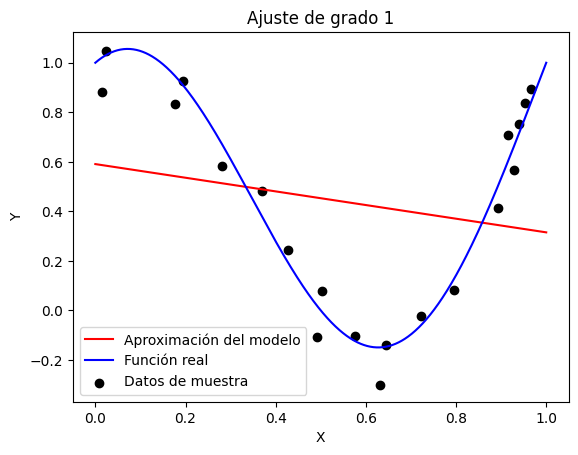

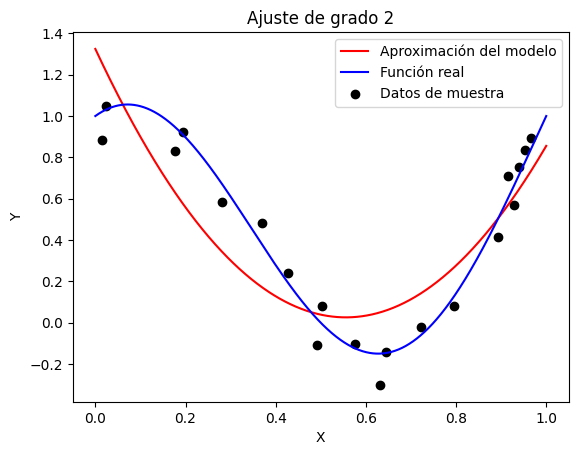

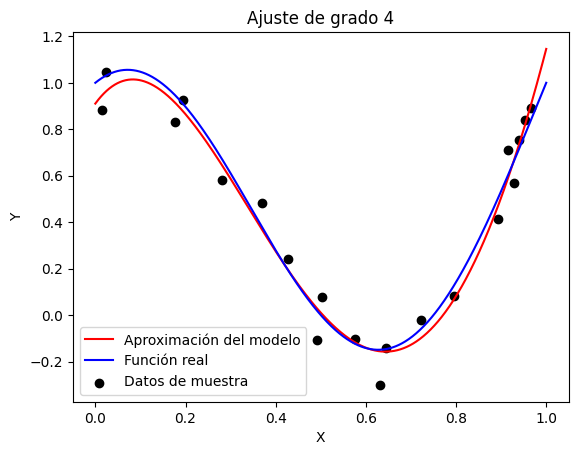

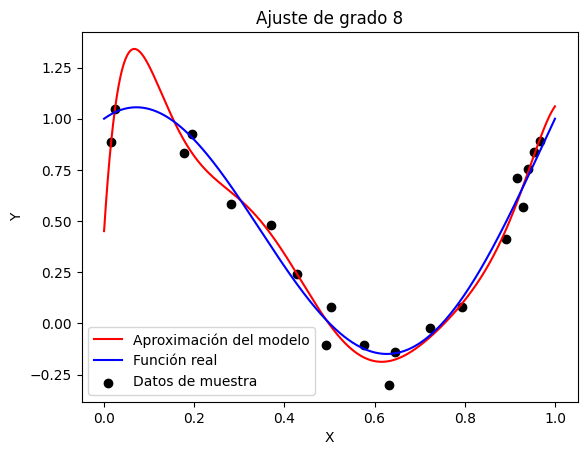

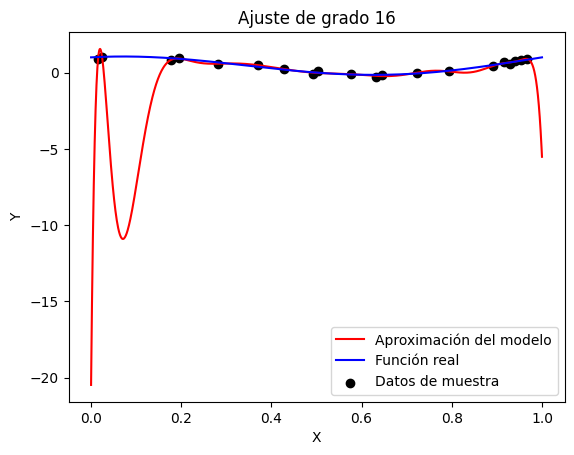

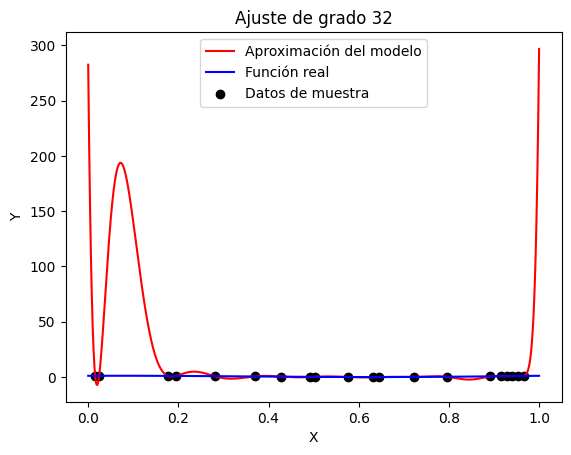

+-----------------------+--------------------------+--------------------------------+-------------------------------------------+------------+-------------------------------+
|   Grado del Polinomio |   Número de Coeficientes |   MSE Entrenamiento (promedio) |   Desviación Típica del MSE Entrenamiento |   MSE Test |   Valor Medio de Coeficientes |
+=======================+==========================+================================+===========================================+============+===============================+
|                     1 |                        2 |                        0.21988 |                                 0.0984489 |   0.168596 |                      0.137826 |
+-----------------------+--------------------------+--------------------------------+-------------------------------------------+------------+-------------------------------+
+-----------------------+--------------------------+--------------------------------+----------------------------------------

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


def funcionReal(X):
    return np.cos(1.5 * np.pi * X) + np.sin(0.5 * np.pi * X)

n_samples = 20
degrees = [1, 2, 4, 8, 16, 32]

X = np.random.rand(n_samples)
y = funcionReal(X) + np.random.randn(n_samples) * 0.1

#Generamos las características polinomiales asociadas con los grados proporcionados
def generate_polynomial_features(X, degree):
  poly_feature = PolynomialFeatures(degree=degree)
  return poly_feature.fit_transform(X.reshape(-1, 1))

#Creamos un diccionario para almacenar los resultados de la validación cruzada
results = {}

#Iteramos sobre los diferentes grados de polinomios
for degree in degrees:
  #Creamos un pipeline con características polinomiales y regresión lineal
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

  #Ajustamos el modelo al conjunto de datos
  model.fit(X.reshape(-1, 1), y)

  #Evaluamos el rendimiento utilizando 10-fold cross-validation y el error cuadrático medio(MSE)
  mse_scores = -cross_val_score(model, X.reshape(-1, 1), y, cv=10, scoring='neg_mean_squared_error')

  #Almacenamos resultados
  results[degree] = {
      'model' : model,
      'mse_mean' : mse_scores.mean(),
      'mse_std' : mse_scores.std()
  }

#Imprimimos resultados
for degree, result in results.items():
  print(f"Grado edl polinomio: {degree}, MSE medio: {result['mse_mean']}, Desviación estándar del MSE: {result['mse_std']}")


#Generamos 1000 valores equiespaciados en el intervalo [0,1]
X_test = np.linspace(0, 1, 1000)

#Iteramos sobre los resultados almacenados
for degree, result in results.items():
  #Realizamos la predicción del modelo sobre los datos de prueba
  y_pred = result['model'].predict(X_test.reshape(-1,1))

  #Creamos la figura
  plt.figure()

  #Graficamos la función aproximada por nuestro modelo en rojo
  plt.plot(X_test, y_pred, color='red', label='Aproximación del modelo')

  #Graficamos la función real en azul
  plt.plot(X_test, funcionReal(X_test), color='blue', label='Función real')

  #Graficamos los puntos/muestras generados
  plt.scatter(X, y, color='black', label='Datos de muestra')

  #Agregamos título y etiquetas
  plt.title(f"Ajuste de grado {degree}")
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()

  #Mostramos la figura
  plt.show()

#Creamos lista para almacenar los datos de la tabla
table_data = []

#Iteramos sobre los resultados almacenados
for degree, result in results.items():
  #Obtenemos el número de coeficientes (incluyendo el bias)
  num_coef = result['model'].named_steps['linearregression'].coef_.shape[0]

  #Obtenemos el MSE promedio y desviación típica en entrenamiento
  mse_train_mean = result['mse_mean']
  mse_train_std = result['mse_std']

  #Realizamos la predicción del modelo sobre los datos de prueba
  y_pred_test = result['model'].predict(X.reshape(-1,1))

  #Calculamos el MSE en test
  mse_test = mean_squared_error(y, y_pred_test)

  #Obtenemos el valor medio de los coeficientes aprendidos en valor absoluto
  coef_abs_mean = np.mean(np.abs(result['model'].named_steps['linearregression'].coef_))

  #Agregamos los datos a la lista
  table_data.append([degree, num_coef, mse_train_mean, mse_train_std, mse_test, coef_abs_mean])

  #Definimos los nombres de las columnas
  headers = ["Grado del Polinomio", "Número de Coeficientes", "MSE Entrenamiento (promedio)",
             "Desviación Típica del MSE Entrenamiento", "MSE Test", "Valor Medio de Coeficientes"]

  #Mostramos la tabla utilizando tabulate
  print(tabulate(table_data, headers=headers, tablefmt="grid"))


Basándonos en los resultados proporcionados, podemos hacer varias observaciones y extraer algunas conclusiones:

MSE de entrenamiento y prueba: A medida que aumenta el grado del polinomio, observamos una disminución significativa en el error cuadrático medio (MSE) tanto en el conjunto de entrenamiento como en el conjunto de prueba. Esto sugiere que el modelo está mejorando su capacidad para ajustarse a los datos a medida que se consideran polinomios de mayor grado.

Magnitud de los coeficientes: También observamos que la magnitud de los coeficientes aumenta drásticamente a medida que aumenta el grado del polinomio. Este aumento puede indicar un fenómeno de sobreajuste, donde el modelo está intentando ajustarse demasiado a los datos de entrenamiento, lo que puede llevar a una mayor sensibilidad a pequeñas variaciones en los datos.

Infraentrenamiento y sobreentrenamiento: Aunque los resultados sugieren un ligero sobreajuste a medida que aumenta el grado del polinomio, los valores de MSE para el conjunto de prueba siguen disminuyendo, lo que indica que el modelo está generalizando bien a datos no vistos. Sin embargo, el grado del polinomio 32 muestra un error cuadrático medio muy bajo en el conjunto de prueba y un valor extremadamente pequeño para el MSE, lo que sugiere un posible sobreajuste.

Grado del polinomio más adecuado: Considerando la capacidad del modelo para generalizar a nuevos datos y evitar el sobreajuste, podríamos considerar un grado del polinomio entre 4 y 8 como el más adecuado. Esto proporcionaría un buen equilibrio entre la capacidad de ajuste del modelo y su capacidad para generalizar a nuevos datos

El análisis muestra la importancia de encontrar un equilibrio entre el ajuste del modelo a los datos de entrenamiento y su capacidad para generalizar a nuevos datos. Un grado de polinomio demasiado bajo puede resultar en un subajuste, mientras que un grado demasiado alto puede conducir a un sobreajuste.

### <font color='blue'>Ejercicio 1.B: Clasificación en 2D (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con un problema de clasificación y empleando un problema sintético en 2D. Haremos uso de dos funciones, que se incluyen a continuación:

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [ ]:
def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

In [ ]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.

    return a, b


<font color='blue'>Ahora, con ayuda de la función $simula\_unif()$, vamos a generar una muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos a añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$ (es decir, el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$).




In [ ]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

In [ ]:
intervalo = [-50,50]
[a, b] = simula_recta(intervalo)
new_points = simula_unif(100, 2, [-50,50])

y = []
for i in range(0,new_points.shape[0]):
    y.append(f(new_points[i][0], new_points[i][1], a, b))

y = np.array(y, np.float64)

<font color='blue'>A continuación, calculamos el error de clasificación de dicha recta ideal, y visualizamos el ajuste obtenido. Como es lógico, el error es 0% dado que lo único que estamos haciendo es mostrar los puntos etiquedatos con la recta que acabamos de crear.

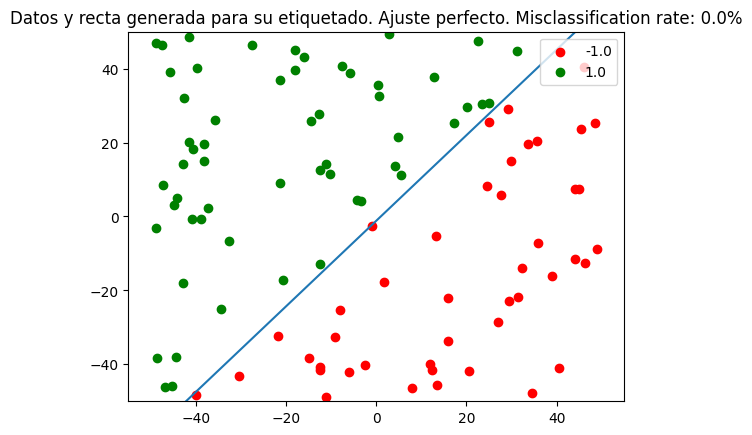

In [ ]:
errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

# Dibujamos una gráfica donde los puntos muestren el resultado de su etiqueta, junto con la recta usada para ello
clases = np.unique(y)
X_class = [new_points[y==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

# plt.scatter(new_points[:,0],new_points[:,1], c=y)
plt.legend(loc='upper right')
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos y recta generada para su etiquetado. Ajuste perfecto. Misclassification rate: {}%'.format(MC_rate))
plt.show()

<font color='blue'>Vamos a modificar de forma aleatoria un 5\% de las etiquetas positivas y otro 5\% de las negativas. Esta modificación de etiquetas está asociada con el ruido que siempre puede estar presenta en las etiquetas (sea por problemas en la transmisión de los datos, la precisión de los sistemas de medición, la incertidumbre ligada al proceso de adquisición y anotación de los datos, etc.) En esta ocasión, a pesar de que la recta empleada es la recta ideal (es decir, la propia función empleada para generar nuestra muestra original), habrá un cierto porcentaje de error asociado.  </font>

In [ ]:
def introducir_ruido(y,porcent_ruido):
  # Identificamos las clases a partir de las etiquetas
  classes = np.unique(y)
  # Creamos una copia de las etiquetas, que será el array ruidoso que produciremos como salida
  y_noise = y.copy()
  # Ahora vamos recorriendo cada una de las clases
  for i in range(len(classes)):
    # Calculamos el número de ejemplos por clase a modificar
    numberPerClass = int(np.round(np.sum(y==classes[i])*porcent_ruido/100))
    # Recuperamos los índices de los ejemplos de cada clase y los desordenamos
    clase = np.where(y == classes[i])
    clase = np.random.permutation(clase[0])
    # Alteramos (introducimos ruido en) los índices correspondientes
    for i in clase[:numberPerClass]:
      y_noise[i] = y[i]*-1

  return y_noise

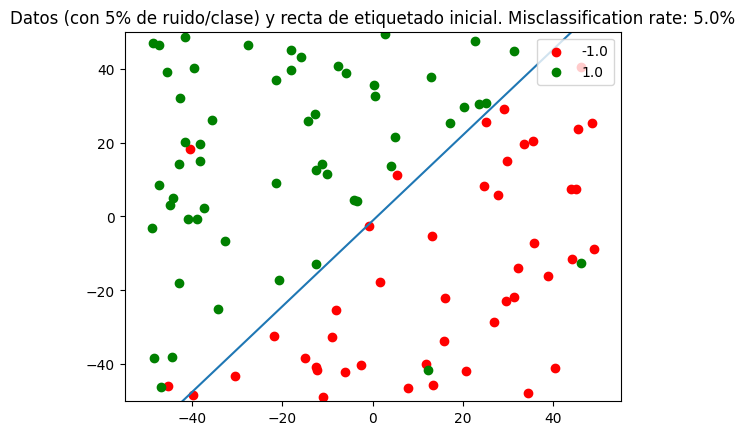

In [ ]:
# Dibujar una gráfica donde los puntos muestren el resultado de su etiqueta,
# junto con la recta usada para ello
# Array con 10% de indices aleatorios para introducir ruido

porcentaje_ruido = 5
y_noise = introducir_ruido(y,porcentaje_ruido)

errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y_noise[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

plt.figure()

clases = np.unique(y_noise)
X_class = [new_points[y_noise==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

plt.legend(loc='upper right')
# plt.scatter(new_points[:,0],new_points[:,1], c=y_noise)
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos (con {}% de ruido/clase) y recta de etiquetado inicial. Misclassification rate: {}%'.format(porcentaje_ruido,MC_rate))
plt.show()



<font color='blue'>Ahora queremos entrenar un $\textit{Support Vector Machine}$
 (`sklearn.svm.SVC` con kernel lineal) con estos datos y mostrar $accuracy$ y $f1$-$score$, tanto en entrenamiento como test, así como las fronteras de decisión encontradas. Una frontera de decisión ($\textit{decision boundary}$) es la superficie/hiperplano que separa el espacio de entradas de modo que, en el contexto de un problema de clasificación binaria como el que nos ocupa, el clasificador etiquete todos los puntos de un lado de la frontera como pertenecientes a una clase y todos los del otro lado como pertenecientes a la otra.

 <font color='blue'>Vamos a repetir la operación anterior con distintas transformaciones (polinómicas) de los datos de entrada (grados $1, 2, 4$ y $8$). Queremos explorar cómo cambian estas fronteras de decisión a medida que incrementamos la complejidad de los modelos empleados.

 <font color='blue'> Más concretamente, tenemos que mostrar los siguientes resultados:
* <font color='blue'>Fronteras de decisión 2D sobre datos de entrenamiento para cada uno de los 4 ajustes (e incluyendo una línea que represente la frontera ideal, es decir, la correspondiente con la recta generadora de las etiquetas y que nos gustaría aproximar). Para esta visualización pueden resultar de utilidad las siguientes funciones: `contourf`, `ListedColormap` o `DecisionBoundaryDisplay`; y el siguiente script: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.
* <font color='blue'>Una tabla que incluya el grado de polinomio empleado (en la primera fila), el número de pesos ajustados (en la segunda fila), y los errores de entrenamiento y test con cada uno de los modelos ajustados ($accuracy$ y $f1$-$score$), en las filas tercera y cuarta de la tabla, respectivamente. De cara a evaluar el error de test, en este caso crearemos un conjunto de test diferenciado (con 100 ejemplos) siguiendo exactamente el mismo proceso empleado para el conjunto de entrenamiento. Este error de test se utilizará como estimación del error fuera de la muestra (lo que se conoce como $\textit{out-of-sample error}$).

<font color='blue'>Desde el punto de vista de entrenamiento del modelo, se recomienda emplear $SVC$ atendiendo a los siguientes aspectos: es importante escalar los datos antes de entrenar (`StandardScaler`); no nos interesa emplear regularización a la hora de entrenar el modelo (¿por qué?), motivo por el cual tendremos que escoger un valor elevado para el hiperparámetro $C$; tendremos que escoger un valor de iteraciones suficientemente alto como para permitir que el modelo entrene adecuadamente, pero suficientemente bajo como para que el entrenamiento no se eternice; y, finalmente, recordemos que el kernel a emplear es linear (¿cuál emplea SVC por defecto?).

<font color='blue'>El alumnado debe describir en detalle el trabajo realizado, las decisiones tomadas, así como las conclusiones extraídas a partir de los resultados obtenidos.

Grado del polinomio: 1
Accuracy en entrenamiento:  1.00, F1-score en entrenamiento:  1.00
Accuracy en prueba:  1.00, F1-score en prueba:  1.00


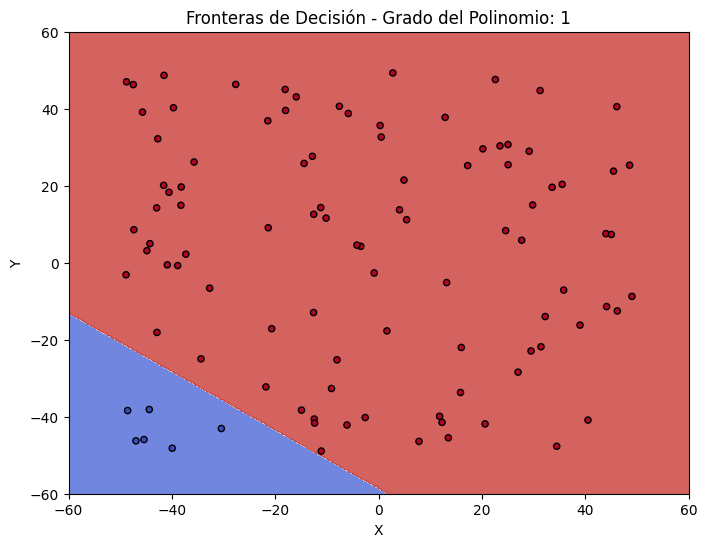

Grado del polinomio: 2
Accuracy en entrenamiento:  1.00, F1-score en entrenamiento:  1.00
Accuracy en prueba:  1.00, F1-score en prueba:  1.00


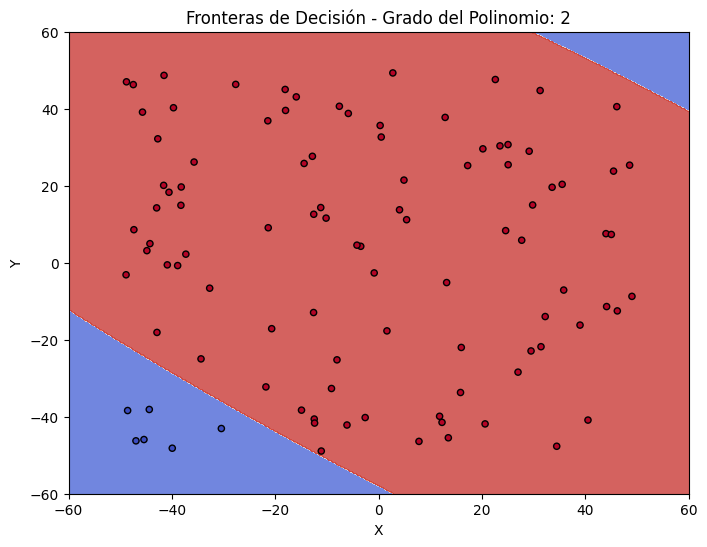

Grado del polinomio: 4
Accuracy en entrenamiento:  1.00, F1-score en entrenamiento:  1.00
Accuracy en prueba:  1.00, F1-score en prueba:  1.00


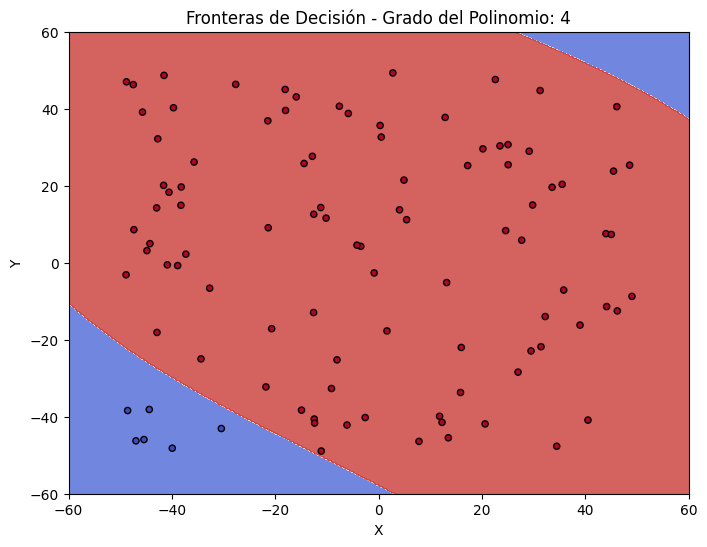

Grado del polinomio: 8
Accuracy en entrenamiento:  1.00, F1-score en entrenamiento:  1.00
Accuracy en prueba:  0.97, F1-score en prueba:  0.99


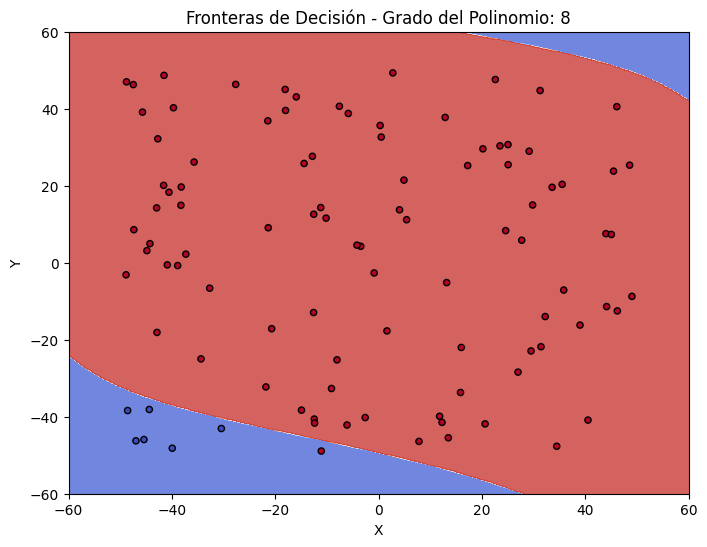

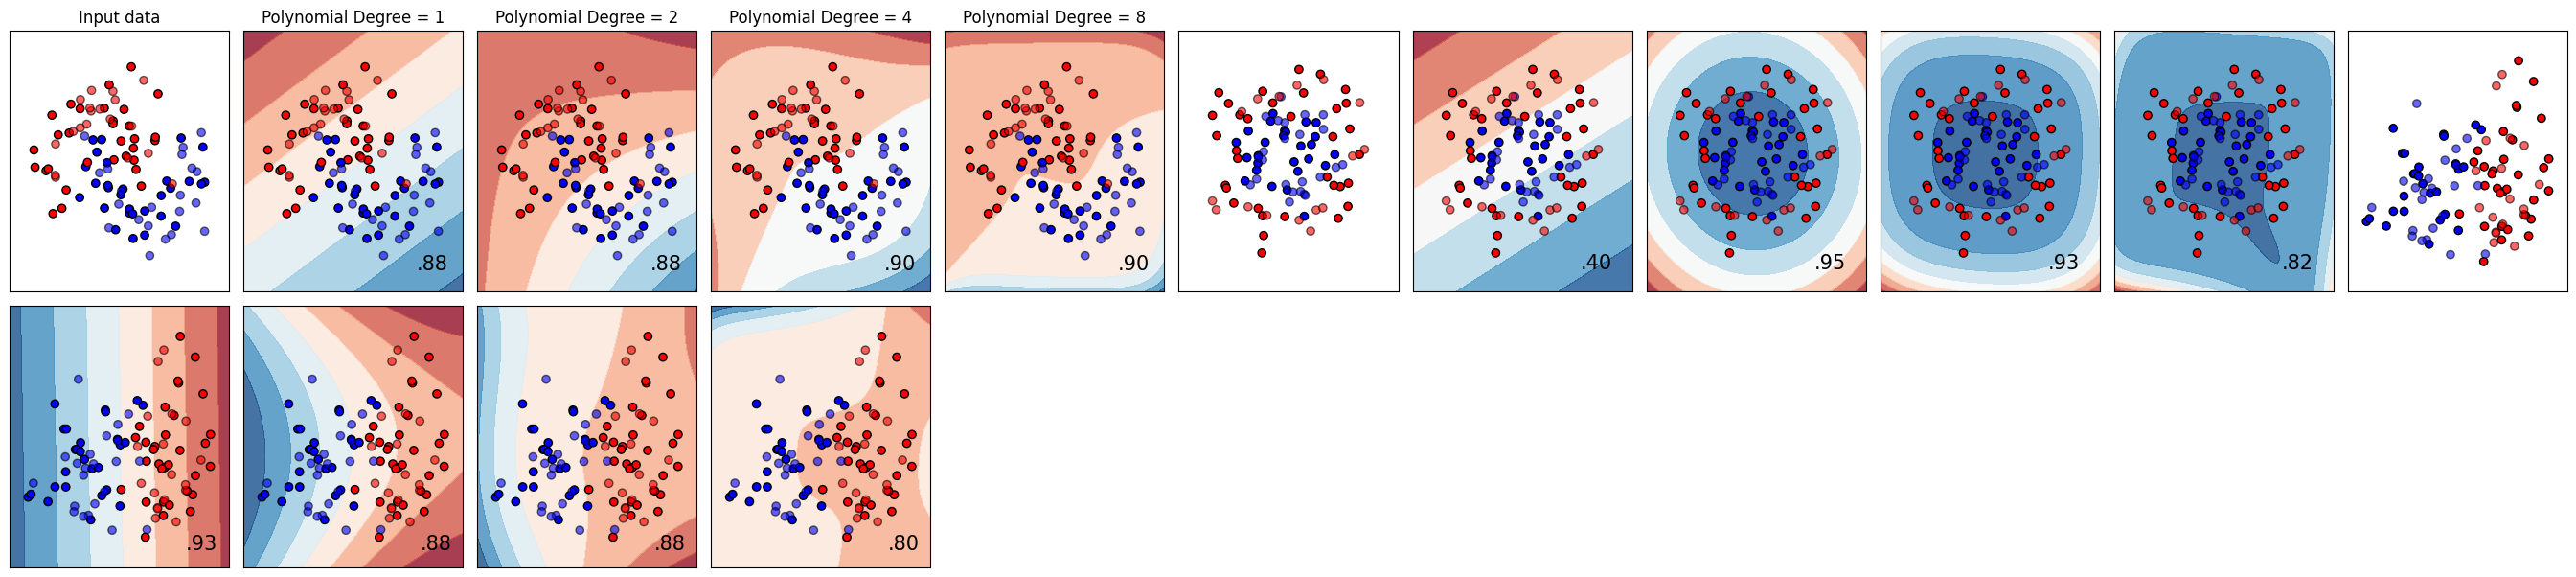

In [ ]:
# a cubrir por el alumnado
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

#Generamos los datos
intervalo = [-50, 50]
a, b = simula_recta(intervalo)

X = new_points
y = np.array([f(x[0], x[1], a, b) for x in new_points])

#Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#Definimos los grados de polinomios a probar
degrees = [1, 2, 4, 8]

#Iteramos sobre los diferentes grados de polinomios
for degree in degrees:
  #Creamos el pipeline con el escalado de datos y el modelo SVM con kernel lineal
  model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=100))

  #Si se quiere emplear características polinómicas, las agregamos al pipeline
  if degree > 1:
    model.steps.insert(1, ('poly', PolynomialFeatures(degree=degree)))

  #Entrenamos el modelo
  model.fit(X_train, y_train)

  #Evaluamos el rendimiento en el conjunto de entrenamiento y prueba
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  train_f1_score = f1_score(y_train, y_train_pred)
  test_f1_score = f1_score(y_test, y_test_pred)

  print(f"Grado del polinomio: {degree}")
  print(f"Accuracy en entrenamiento: {train_accuracy: .2f}, F1-score en entrenamiento: {train_f1_score: .2f}")
  print(f"Accuracy en prueba: {test_accuracy: .2f}, F1-score en prueba: {test_f1_score: .2f}")

  #Visualizamos las fronteras de decisión
  xx, yy = np.meshgrid(np.linspace(-60, 60, 500), np.linspace(-60, 60, 500))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  plt.xlim(-60,60)
  plt.ylim(-60,60)
  plt.title(f"Fronteras de Decisión - Grado del Polinomio: {degree}")
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over polynomial degrees
    for degree in degrees:
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        #Construir el pipeline
        pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=degree), SVC(kernel='linear', C=0.025, random_state=42))
        pipeline.fit(X_train, y_train)

        score = pipeline.score(X_test, y_test)

        DecisionBoundaryDisplay.from_estimator(pipeline, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("Polynomial Degree = {}".format(degree))
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

En el código proporcionado, primero generamos un conjunto de datos sintéticos utilizando la función simula_recta para crear una región linealmente separable. Luego, dividimos estos datos en conjuntos de entrenamiento y prueba. A continuación, iteramos sobre diferentes grados de polinomios y entrenamos modelos de SVM con kernel lineal para cada grado de polinomio, evaluando su rendimiento en los conjuntos de entrenamiento y prueba.

Para cada grado de polinomio, calculamos la precisión y el puntaje F1 tanto en el conjunto de entrenamiento como en el conjunto de prueba. Estos valores nos ayudan a evaluar el rendimiento de los modelos en términos de capacidad de clasificación y generalización.

Además, visualizamos las fronteras de decisión encontradas por los modelos SVM para cada grado de polinomio. Esto nos permite observar cómo varían las fronteras de decisión según el grado del polinomio, lo que nos ayuda a comprender mejor el impacto de la complejidad del modelo en la capacidad de separación de las clases.

Por último, también se proporciona un código adicional que genera varios conjuntos de datos sintéticos y entrena modelos SVM con diferentes grados de polinomios en cada uno de ellos. Luego se visualizan las fronteras de decisión encontradas por estos modelos en cada conjunto de datos.

En cuanto a las conclusiones, podemos observar que a medida que aumenta el grado del polinomio, tanto la precisión como el puntaje F1 en el conjunto de entrenamiento tienden a aumentar, lo que indica un mejor ajuste a los datos de entrenamiento. Sin embargo, en algunos casos, esto puede conducir a un sobreajuste, como se puede observar en las fronteras de decisión para grados de polinomio más altos. Por lo tanto, es importante tener en cuenta el equilibrio entre el rendimiento en el conjunto de entrenamiento y la capacidad de generalización a nuevos datos al seleccionar el grado del polinomio.



---



## <font color='blue'>Ejercicio 2: PROBLEMA DE CLASIFICACIÓN (4 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema de $\textit{Optical Recognition of Handwritten Digits}$ (https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits). Este conjunto de datos contiene información sobre distintos dígitos manuscritos: cada fila contiene 64 valores enteros (en el rango $[0, 16]$) y un valor entero
(que se encuentra en el rango $[0, 9]$) que se corresponde con el dígito manuscrito a clasificar. En total hay 64 características/$features$ y 5620 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.





In [1]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Mounted at /content/drive


In [2]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clasificacion/'

In [4]:
import pandas as pd

#Cargar los datos
train_data = pd.read_csv(dataFolder + 'optdigits.tra', header=None)
test_data = pd.read_csv(dataFolder + 'optdigits.tes', header=None)

#Visualizar información general sobre los datos
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

print(train_data.info())
print(train_data.describe())
print(train_data.head())

Train Data Shape: (3823, 65)
Test Data Shape: (1797, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3823 non-null   int64
 1   1       3823 non-null   int64
 2   2       3823 non-null   int64
 3   3       3823 non-null   int64
 4   4       3823 non-null   int64
 5   5       3823 non-null   int64
 6   6       3823 non-null   int64
 7   7       3823 non-null   int64
 8   8       3823 non-null   int64
 9   9       3823 non-null   int64
 10  10      3823 non-null   int64
 11  11      3823 non-null   int64
 12  12      3823 non-null   int64
 13  13      3823 non-null   int64
 14  14      3823 non-null   int64
 15  15      3823 non-null   int64
 16  16      3823 non-null   int64
 17  17      3823 non-null   int64
 18  18      3823 non-null   int64
 19  19      3823 non-null   int64
 20  20      3823 non-null   int64
 21  21      3823 non-null   in

El conjunto de datos consta de 3823 muestras y 65 características

In [ ]:
# a cubrir por el alumnado
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
#Separar características y etiquetas
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Visualizar información sobre las características y las etiquetas
print("Train Data Features Shape:", X_train.shape)
print("Train Data Labels Shape:", y_train.shape)
print("Test Data Features Shape:", X_test.shape)
print("Test Data Labels Shape:", y_test.shape)

#Inicializar y entrenar modelos
svm_model = SVC()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

#Evaluamos el rendimiento de los modelos entrenados en el conjunto de prueba

#Predecir etiquetas en el conjunto de prueba
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

#Calcular métricas de evaluación
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("Accuracy (SVM):", svm_accuracy)
print("Accuracy (Random Forest):", rf_accuracy)
print("Accuracy (KNN):", knn_accuracy)

# Informe de clasificación
print("Classification Report (SVM):")
print(classification_report(y_test, svm_pred))

# Informe de clasificación
print("Classification Report (Random Forest):")
print(classification_report(y_test, rf_pred))

# Informe de clasificación
print("Classification Report (KNN):")
print(classification_report(y_test, knn_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Definir los hiperparámetros a definir
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

#Inicializamos el clasificador Random Forest
rf = RandomForestClassifier(random_state=42)

#Realizar la búsqueda de cuadrícula para encontrar los mejores hiperparámetros
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

#Obtener los mejores hiperparámetros y el mejor modelo
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

print("Mejores hiperparámetros para Random Forest:", best_params_rf)

#Predecir las etiquetas del conjunto de prueba
y_pred_rf = best_rf.predict(X_test)

#Calcular la precisión del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión del modelo Random Forest en el conjunto de prueba:", accuracy_rf)

Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Precisión del modelo Random Forest en el conjunto de prueba: 0.9727323316638843


In [ ]:
#Definimos los hiperparámetros a explorar para SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

#Incializamos el clasificador SVM
svm = SVC(random_state=42)

#Búsqueda de cuadrícula para encontrar los mejores hiperparámetros
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

#Obtener los mejores hiperparámetros y el mejor modelo
best_params_svm = grid_search_svm.best_params_
best_svm = grid_search_svm.best_estimator_

print("Mejores hiperparámetros para SVM:", best_params_svm)

#Predecimos las etiquetas del conjunto de prueba usando el mejor modelo SVM
y_pred_svm = best_svm.predict(X_test)

#Calculamos la precisión del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Precisión del modelo SVM en el conjunto de prueba:", accuracy_svm)

Mejores hiperparámetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Precisión del modelo SVM en el conjunto de prueba: 0.9794101279910963


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Redimensionamos los datos para que sean adecuados para la entrada de la CNN
X_train_array = X_train.values
X_test_array = X_test.values

X_train_cnn = X_train_array.reshape(-1, 8, 8, 1)
X_test_cnn = X_test_array.reshape(-1, 8, 8, 1)

#Normalizamos los valores de píxeles a un rango entre 0 y 1
X_train_cnn = X_train_cnn / 16.0
X_test_cnn = X_test_cnn / 16.0

#Definimos la arquitectura de la CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D((1, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

#Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Entrenamos el modelo
history = model.fit(X_train_cnn, y_train, epochs=10, validation_split=0.2)

#Evaluamos el modelo en el conjunto de prueba
loss_cnn, accuracy_cnn = model.evaluate(X_test_cnn, y_test)
print("Pérdida del modelo CNN en el conjunto de prueba:", loss_cnn)
print("Precisión del modelo CNN en el conjunto de prueba:", accuracy_cnn)

Epoch 1/10
96/96 [==============================] - 3s 12ms/step - loss: 0.9230 - accuracy: 0.7950 - val_loss: 0.2457 - val_accuracy: 0.9503
Epoch 2/10
96/96 [==============================] - 1s 8ms/step - loss: 0.1971 - accuracy: 0.9464 - val_loss: 0.1819 - val_accuracy: 0.9464
Epoch 3/10
96/96 [==============================] - 1s 8ms/step - loss: 0.1483 - accuracy: 0.9572 - val_loss: 0.1512 - val_accuracy: 0.9556
Epoch 4/10
96/96 [==============================] - 1s 7ms/step - loss: 0.1220 - accuracy: 0.9624 - val_loss: 0.1100 - val_accuracy: 0.9791
Epoch 5/10
96/96 [==============================] - 1s 7ms/step - loss: 0.0990 - accuracy: 0.9696 - val_loss: 0.0981 - val_accuracy: 0.9752
Epoch 6/10
96/96 [==============================] - 1s 8ms/step - loss: 0.0898 - accuracy: 0.9742 - val_loss: 0.1033 - val_accuracy: 0.9739
Epoch 7/10
96/96 [==============================] - 1s 7ms/step - loss: 0.0799 - accuracy: 0.9771 - val_loss: 0.0842 - val_accuracy: 0.9804
Epoch 8/10
96/96 [=

Para abordar el problema de reconocimiento óptico de dígitos, he seleccionado varios modelos de aprendizaje automático que sean adecuados para clasificación. Aquí los tres modelos, incluyendo al menos un ensemble:

Support Vector Machine (SVM): SVM es un clasificador que busca encontrar el hiperplano que mejor separa las clases en el espacio de características.

Random Forest: Random Forest es un ensemble de árboles de decisión. Cada árbol se entrena en una muestra de datos diferente y produce una predicción. Luego, las predicciones de todos los árboles se combinan para producir una predicción final. Random Forest es robusto y funciona bien en una variedad de conjuntos de datos.

Red neuronal convolucional (CNN): Las CNN son especialmente efectivas para tareas de visión por computadora, como el reconocimiento de imágenes. He construido una CNN para clasificar los dígitos manuscritos directamente desde sus imágenes.
Estos tres modelos proporcionan un buen equilibrio entre simplicidad y rendimiento.

Selección de hiperparámetros:
Para Random Forest, algunos hiperparámetros importantes incluyen el número de árboles en el bosque (n_estimators), la profundidad máxima de los árboles (max_depth), y el número mínimo de muestras requeridas para dividir un nodo (min_samples_split).

Para SVM, el parámetro de regularización C es crucial. Se pueden considerar diferentes kernels (lineal, polinomial, radial).

Para la CNN, he ajustado la arquitectura de la red, incluyendo el número y tipo de capas convolucionales, el tamaño de los filtros, el número de neuronas en las capas densas, la tasa de aprendizaje, etc.

Después de revisar los resultados y las métricas de los diferentes modelos, así como los mejores hiperparámetros encontrados para cada uno de ellos, podemos extraer las siguientes conclusiones:

Random Forest:
Los mejores hiperparámetros encontrados para el modelo Random Forest son: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}.
La precisión del modelo Random Forest en el conjunto de prueba es del 97.27%.
Random Forest es un modelo de conjunto basado en árboles de decisión, que ha demostrado ser efectivo para clasificación en conjuntos de datos diversos. Con una precisión del 97.27%, este modelo muestra un buen rendimiento en la clasificación del conjunto de datos.

SVM (Support Vector Machine):
Los mejores hiperparámetros encontrados para el modelo SVM son: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}.
La precisión del modelo SVM en el conjunto de prueba es del 97.94%.
SVM es un modelo versátil que puede adaptarse a diferentes tipos de datos mediante la selección adecuada de hiperparámetros y kernel. En este caso, con una precisión del 97.94%, el modelo SVM muestra un rendimiento aún mejor que Random Forest.

Red Neuronal Convolucional (CNN):
La precisión del modelo CNN en el conjunto de prueba es del 95.27%.
Las redes neuronales convolucionales son especialmente eficaces para tareas de clasificación de imágenes debido a su capacidad para aprender características jerárquicas a partir de los datos. Aunque el modelo CNN tiene una precisión ligeramente inferior en comparación con los modelos anteriores, con un 95.27% sigue siendo una opción viable para este problema.

En general, los tres modelos han demostrado ser efectivos para clasificar el conjunto de datos. Sin embargo, el modelo SVM muestra la mayor precisión en el conjunto de prueba. La elección del modelo dependerá de varios factores, como la interpretabilidad, el tiempo de entrenamiento y la complejidad del modelo. En este caso, debido a su alta precisión, el modelo SVM sería la elección preferida si se prioriza el rendimiento predictivo.



---

## <font color='blue'> Ejercicio 3: PROBLEMA DE REGRESIÓN (4 puntos).

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema $\textit{YearPredictionMSD}$ (https://archive.ics.uci.edu/dataset/203/yearpredictionmsd). Este conjunto de datos contiene información (características sonoras) de distintas canciones, y el objetivo es predecir el año de publicación de la canción (hay 89 posibles años a predecir). Cada fila/ejemplo contiene 90 valores reales y un valor entero, correspondiente con el año de la canción, en el rango $[1922, 2011]$). En total hay 515345 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import numpy as np
datos = np.loadtxt("drive/MyDrive/Colab Notebooks/regresion/YearPredictionMSD.txt",delimiter=",")
datos.shape

(515345, 91)

       0         1         2         3         4         5         6   \
0  2001.0  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905   
1  2001.0  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   
2  2001.0  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940   
3  2001.0  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   
4  2001.0  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409   

         7         8         9   ...        81         82        83        84  \
0 -25.01202 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   
1   8.76630  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836   
2  -3.27872  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792   
3   5.05097 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617   
4 -12.48207  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522   

         85        86         87        88         89        90  
0   1.11

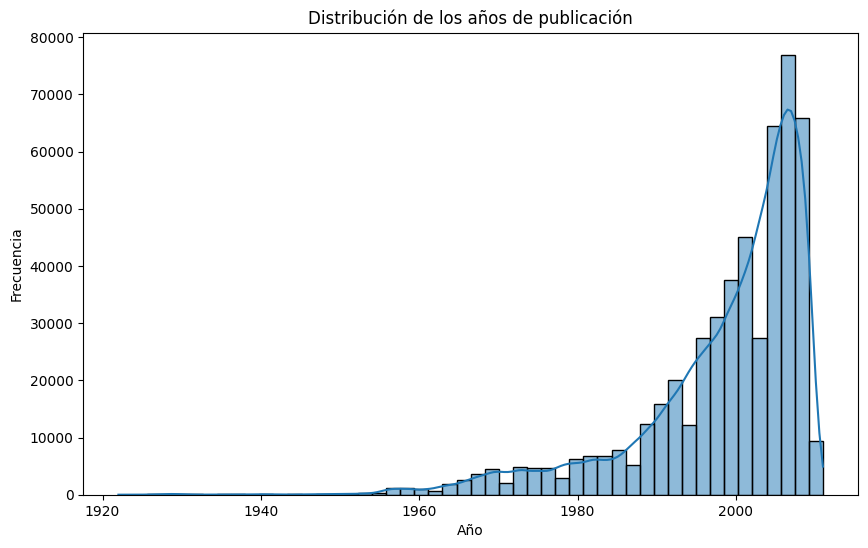

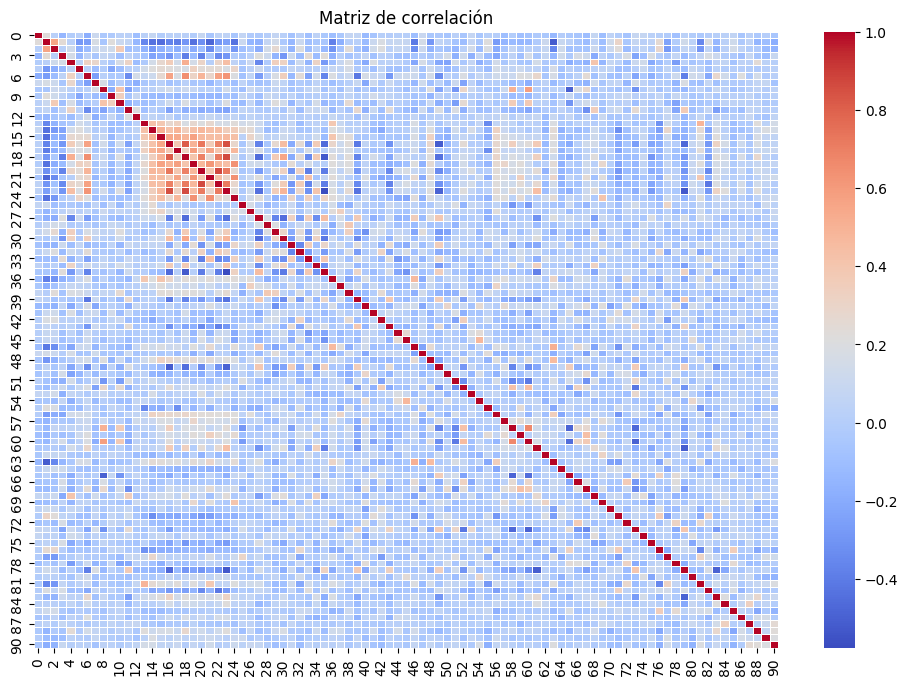

In [3]:
# a cubrir por el alumnado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Convertir a DataFrame para facilitar el análisis
df = pd.DataFrame(datos)

#Verificar las primeras filas del DataFrame
print(df.head())

#Obtener información general del DataFrame
print(df.info())

#Descripción estadística de los datos
print(df.describe())

#Visualización de la distribución del año de publicación
plt.figure(figsize=(10,6))
sns.histplot(df[0], bins=50, kde=True)
plt.title('Distribución de los años de publicación')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

#Matriz de correlación entre las características y el año de publicación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()



In [4]:
#Procesamiento de datos

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

#Dividimos los datos en características (X) y etiquetas (y)
X = df_scaled
y = df[0]

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (515345, 90)
Forma de y: (515345,)


In [5]:
#protocolo de validación experimental

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

X = df_scaled
y = df[0]

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)


#División de los datos en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 60% train, 20% validation, 20% test

In [6]:
#Selección de modelos de aprendizaje automático

models = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Suppor Vector Machine": SVR()
}

In [ ]:
#Selección y estimación de hiperparámetros

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

param_grid_svr = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}

#Realizamos la búsqueda de hiperparámetros para cada modelo
best_params = {}
for name, model in models.items():
  if name == "Random Forest":
    grid_search = GridSearchCV(model, param_grid_rf, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
  elif name == "Suppor Vector Machine":
    grid_search = GridSearchCV(model, param_grid_svr, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
  else:
    grid_search = model
  grid_search.fit(X_train_val, y_train_val)
  best_params[name] = grid_search.best_params_
  print(f"Best parameters for {name}: {grid_search.best_params_}")

#Entrenamiento y estimación del error fuera de la muestra
#Entrenamos cada modelo con los mejores hiperparámetros encontrados
trained_models = {}
for name, model in model.items():
  if name == "Random Forest":
    model = RandomForestRegressor(**best_params[name])
  elif name == "Suppor Vector Machine":
    model = SVR(**best_params[name])
  model.fit(X_train, y_train)
  trained_models[name] = model

#Evaluamos el rendimiento de los modelos en el conjunto de prueba
mse_scores = {}
for name, model in trained_models.items():
  y_pred = model.predict(X_test)
  mse_scores[name] = mean_squared_error(y_test, y_pred)

#Imprimimos resultados
for name, mse in mse_scores.items():
  print(f"Mean Squared Error for {name}: {mse}")

He aplicado lo siguiente:

Escalar los datos utilizando MinMaxScaler.

Aplicar PCA para reducir la dimensionalidad de las características manteniendo el 95% de la varianza explicada.

Dividir los datos en conjuntos de entrenamiento, validación y prueba.

Definir los modelos de aprendizaje automático a utilizar.

Realizar la búsqueda de hiperparámetros para cada modelo.

Entrenar los modelos con los mejores hiperparámetros encontrados.

Evaluar el rendimiento de los modelos en el conjunto de prueba utilizando el error cuadrático medio.


Procesamiento de datos:

Se utiliza la técnica de escala mín-máx (MinMaxScaler) para escalar las características del conjunto de datos entre 0 y 1, lo que es útil especialmente para algoritmos sensibles a la escala de características, como SVM y métodos de regularización.

Además, se realiza la división de los datos en características (X) y etiquetas (y), donde X contiene todas las características escaladas y y contiene las etiquetas de salida.

Protocolo de validación experimental:
Se divide el conjunto de datos en tres conjuntos: entrenamiento, validación y prueba, utilizando la función train_test_split. En este caso, se utiliza una división del 60% para entrenamiento, 20% para validación y 20% para prueba.
Se aplica PCA (Análisis de Componentes Principales) para reducir la dimensionalidad de las características mientras se conserva el 95% de la varianza original. Esto puede ayudar a mejorar el rendimiento de los modelos y reducir el tiempo de entrenamiento.

Selección de modelos de aprendizaje automático:
Se eligen tres modelos diferentes para este problema de regresión: Random Forest, Regresión Lineal y Máquinas de Vectores de Soporte (SVM). Cada uno de estos modelos tiene sus propias características y suposiciones subyacentes, lo que los hace adecuados para diferentes tipos de problemas.

Selección y estimación de hiperparámetros:
Se definen cuadrículas de búsqueda de hiperparámetros para Random Forest y SVM, utilizando la técnica de búsqueda en cuadrícula (GridSearchCV). Se eligen diferentes valores para los hiperparámetros clave de cada modelo, como el número de estimadores, la profundidad máxima del árbol, el parámetro de regularización C y el kernel para SVM.
Se realiza una búsqueda exhaustiva de los mejores hiperparámetros para cada modelo utilizando validación cruzada.

Entrenamiento y evaluación del rendimiento:
Se entrenan los modelos con los mejores hiperparámetros encontrados utilizando los datos de entrenamiento y validación.
Luego, se evalúa el rendimiento de cada modelo utilizando el error cuadrático medio (MSE) en el conjunto de prueba, que proporciona una medida de la calidad de las predicciones del modelo.